# Naive Bayes Classifier - Stock Prediction

# Aim

The aim of this notebook is to predict whether the stock price will move upwards or downwards using the Dataset from Yahoo api.
Here we use continuous Datset for prediction.



# Dataset Description

The dataset that will be used is the **Stock Price Prediction Dataset**, which was extracted from yahoof API, which contains about **234** rows and **15** features.

------------------------------------------------------------
<table>
    <tr>
        <th><center> Name </center></th>
        <th><center> Type </center></th>
        <th><center> Values </center></th>
        <th><center> Description </center></th>
    </tr>
    <tr>
        <td><center> High </center></td>
        <td><center> Continuous </center></td>
        <td><center> Non-negative numerical</center></td>
        <td><center> Highest Price of the Stock in that month. </center></td>
    </tr>
    <tr>
        <td><center> Low  </center></td>
        <td><center> Continuous </center></td>
        <td><center> Non-negative numerical </center></td>
        <td><center> Lowest Price of the Stock in that month.</center></td>
    </tr>
    <tr>
        <td><center> Open </center></td>
        <td><center> Continuous </center></td>
        <td><center> Non-negative numerical </center></td>
        <td><center> Opening Price of the Stock in that month. </center></td>
    </tr>
    <tr>
        <td><center> Close </center></td>
        <td><center> Continuous  </center></td>
        <td><center> Non-negative numerical </center></td>
        <td><center> The closing price is just the cash value of the last transacted price before the market closes.</center></td>
    </tr>
    <tr>
        <td><center> Volume  </center></td>
        <td><center> Discrete  </center></td>
        <td><center> Non-negative numerical </center></td>
        <td><center> Average Trading volume of the Stock in that month </center></td>
    </tr>
    <tr>
        <td><center> Adj Close </center></td>
        <td><center> Continuous  </center></td>
        <td><center> Non-negative numerical </center></td>
        <td><center>  The adjusted closing price factors in anything that might affect the stock price after the market closes  </center></td>
    </tr>
    <tr>
        <td><center> Diff </center></td>
        <td><center> Continuous </center></td>
        <td><center> Integer value </center></td>
        <td><center> The Difference between currently closing and previously closing price.</center></td>
    </tr>
    <tr>
        <td><center> SMA_2 </center></td>
        <td><center> Continuous </center></td>
        <td><center> Non-negative numerical </center></td>
        <td><center> This value is obtained by taking average of previous two closing value  </center></td>
    </tr>
    <tr>
        <td><center> Force_Index </center></td>
        <td><center> Continuous </center></td>
        <td><center> Non-negative numerical </center></td>
        <td><center> The force index is a technical indicator that measures the amount of power used to move the price of an asset. </center></td>
    </tr>
    <tr>
        <td><center> y (Y_predict) </center></td>
        <td><center> Binary number </center></td>
        <td><center> 0,1 </center></td>
        <td><center> The value which indicates whether the movement is upward or downward. </center></td>
    </tr>
    
   

</table>

Importing the modules required for this project. 

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import pandas_datareader as pdr

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import BernoulliNB
from datetime import date 



td = date.today() # Use the today method and assign it to the td variable.

print(" Get the today date in Python is: ", td)  

                     #   CODE    FROM_DATE  TO_DATE
df = pdr.get_data_yahoo("AAPL", "2010-11-01", td, interval ="m")
df.to_csv("APP.csv")

df

df["Diff"] = df.Close.diff()

# BINARY CLASSIFICATION


df


 Get the today date in Python is:  2022-11-01


,High,Low,Open,Close,Volume,Adj Close,Diff
Date,,,,,,,
2010-11-01,11.475000,10.634286,10.793571,11.112500,9.508086e+09,9.488206,NaN
2010-12-01,11.666429,11.246071,11.259643,11.520000,6.973235e+09,9.836144,0.407500
2011-01-01,12.450000,11.601429,11.630000,12.118571,1.084154e+10,10.347221,0.598571
2011-02-01,13.032143,12.061429,12.189286,12.614643,9.295950e+09,10.770782,0.496072
2011-03-01,12.916786,11.652143,12.695357,12.446786,1.130646e+10,10.627462,-0.167857
...,...,...,...,...,...,...,...
2022-07-01,163.630005,135.660004,136.039993,162.509995,1.447125e+09,162.284576,25.789993
2022-08-01,176.149994,157.139999,161.009995,157.220001,1.510240e+09,157.001923,-5.289993
2022-09-01,164.259995,138.000000,156.639999,138.199997,2.084238e+09,138.199997,-19.020004


# Overview of the dataset

Adding features by calculating features from the previous features obtained.

In [8]:
df["SMA_2"] = df.Close.rolling(2).mean()


# rolling (2)  Avg of 2 column and printing in in below column  

df["Force_Index"] = df["Close"] * df["Volume"]

df["y"] = df["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)

df.drop( ['Adj Close'] , axis =1, inplace=True)

print(df)



                  High         Low        Open       Close        Volume  \
Date                                                                       
2010-11-01   11.475000   10.634286   10.793571   11.112500  9.508086e+09   
2010-12-01   11.666429   11.246071   11.259643   11.520000  6.973235e+09   
2011-01-01   12.450000   11.601429   11.630000   12.118571  1.084154e+10   
2011-02-01   13.032143   12.061429   12.189286   12.614643  9.295950e+09   
2011-03-01   12.916786   11.652143   12.695357   12.446786  1.130646e+10   
...                ...         ...         ...         ...           ...   
2022-07-01  163.630005  135.660004  136.039993  162.509995  1.447125e+09   
2022-08-01  176.149994  157.139999  161.009995  157.220001  1.510240e+09   
2022-09-01  164.259995  138.000000  156.639999  138.199997  2.084238e+09   
2022-10-01  157.500000  134.369995  138.210007  155.740005  1.769857e+09   
2022-10-31  154.240005  151.929993  153.154999  153.339996  9.794317e+07   

           

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2010-11-01 to 2022-10-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   High         145 non-null    float64
 1   Low          145 non-null    float64
 2   Open         145 non-null    float64
 3   Close        145 non-null    float64
 4   Volume       145 non-null    float64
 5   Diff         144 non-null    float64
 6   SMA_2        144 non-null    float64
 7   Force_Index  145 non-null    float64
 8   y            144 non-null    float64
dtypes: float64(9)
memory usage: 11.3 KB


#  Independent Features are found  

Navie bayes classifier only works on independent Datasets.

<AxesSubplot:>

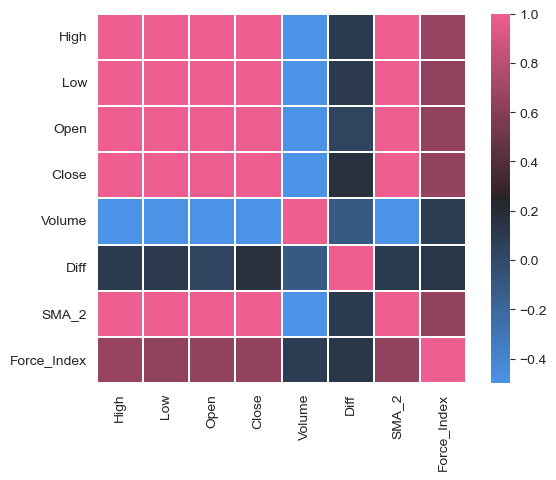

In [13]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [14]:
for col_name in df.columns: 
    print(col_name)

High
Low
Open
Close
Volume
Diff
SMA_2
Force_Index
y


<AxesSubplot:>

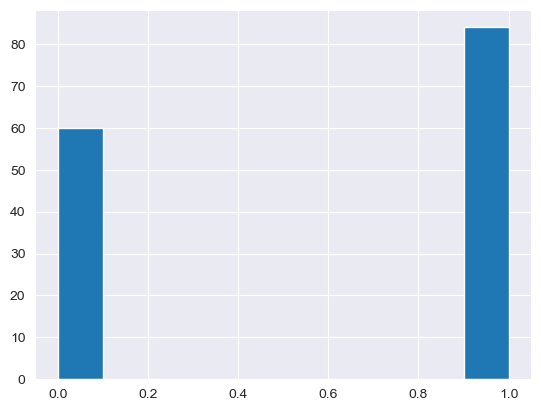

In [15]:
df["y"].hist()

In [16]:
#TAKING UNIQUE DATA COLUMNS AS DATASET 
dataset = df[["SMA_2", "Volume", "Force_Index", "y"]]

# Continous Dataset 

If the Datset is continous predicting navie bayes directly is not possible.
So we use Gausian Distribution or Categorical Classification.

# 1. Considering Gausian Distribution for Continous Datasets 

<AxesSubplot:xlabel='Force_Index', ylabel='Count'>

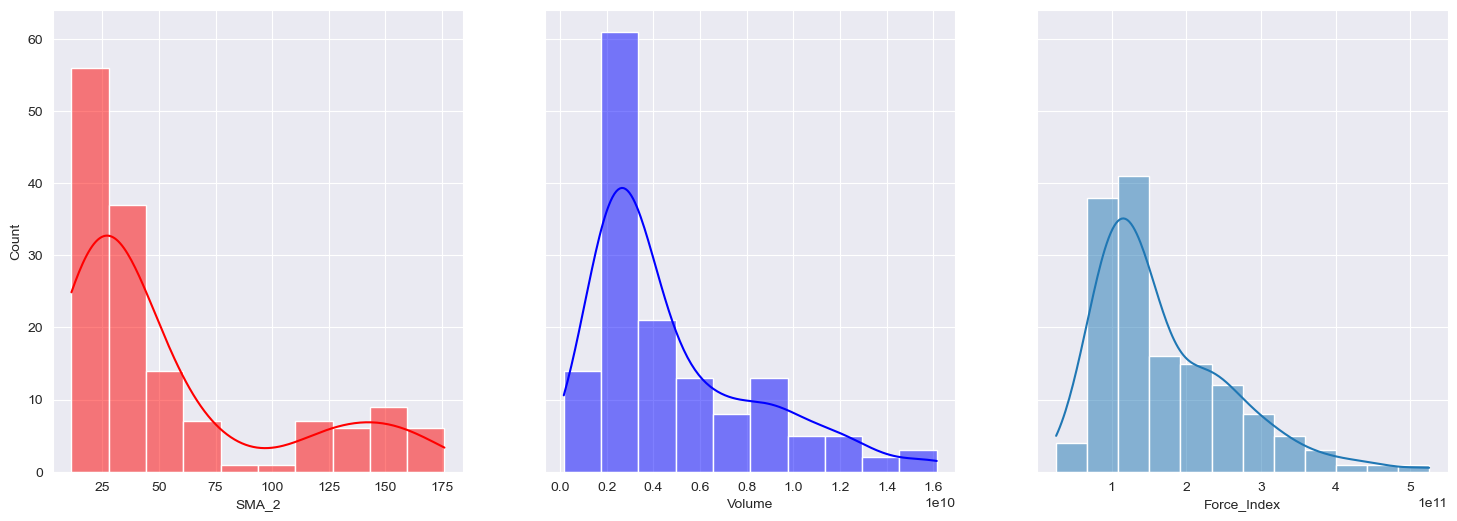

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(dataset, ax=axes[0], x="SMA_2", kde=True, color='r')
sns.histplot(dataset, ax=axes[1], x="Volume", kde=True, color='b')
sns.histplot(dataset, ax=axes[2], x="Force_Index", kde=True)

Gausian Distribution is found in the given dataset by plotting.

In [18]:
def calculate_prior(dataset, Y):
    classes = sorted(list(dataset[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(dataset[dataset[Y]==i])/len(dataset))
    return prior

In [19]:
def calculate_likelihood_gaussian(dataset, feat_name, feat_val, Y, label):
    feat = list(dataset.columns)
    dataset = dataset[dataset[Y]==label]
    mean, std = dataset[feat_name].mean(), dataset[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [20]:
def naive_bayes_gaussian(dataset, X, Y):
    # get feature names
    features = list(dataset.columns)[:-1]

    # calculate prior
    prior = calculate_prior(dataset, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(dataset[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(dataset, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

# Predicting Accuracy in Gausian Distribution Model

In [21]:

train, test = train_test_split(dataset, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="y")

print(X_test)
print(confusion_matrix(Y_test, Y_pred))


print("ACCURACY : ")

print(accuracy_score(Y_test, Y_pred))
#print(f1_score(Y_test, Y_pred))


[[1.13955002e+02 2.12307730e+09 2.52752359e+11]
 [2.80074997e+01 2.88622000e+09 7.97462562e+10]
 [2.53249998e+01 5.08739200e+09 1.23801680e+11]
 [4.26350002e+01 2.12473520e+09 8.98922322e+10]
 [1.99480362e+01 7.05739720e+09 1.41405034e+11]
 [3.19287500e+01 3.81660840e+09 1.24306934e+11]
 [2.25432148e+01 1.21428300e+10 2.58173916e+11]
 [1.26610004e+02 1.83385560e+09 2.22373334e+11]
 [1.46665001e+02 1.79783510e+09 2.54393667e+11]
 [1.71435005e+02 2.44476670e+09 4.34117241e+11]
 [5.13699989e+01 1.89540680e+09 1.00949363e+11]
 [4.31937485e+01 3.71157720e+09 1.65276528e+11]
 [8.53424988e+01 3.24337560e+09 2.95795845e+11]
 [1.12334999e+02 2.89466650e+09 3.15113397e+11]
 [7.28587494e+01 3.01927920e+09 2.06337529e+11]
 [2.29198217e+01 4.82773920e+09 1.12160451e+11]
 [2.86637497e+01 4.29437840e+09 1.18503369e+11]
 [1.59376788e+01 9.44753040e+09 1.51744218e+11]
 [3.22925005e+01 2.29987440e+09 7.87649517e+10]
 [1.83364286e+01 5.88036680e+09 1.10517300e+11]
 [1.18192859e+01 1.08415356e+10 1.313839

# Alter :
# 2. Consider Categorical Classification model 

In [22]:
data = dataset[["y"]]
data["cat_SMA_2"] = pd.cut(dataset["SMA_2"].values, bins = 3, labels = [0,1,2])
data["cat_Volume"] = pd.cut(dataset["Volume"].values, bins = 3, labels = [0,1,2] )
data["cat_Force_Index"] = pd.cut(dataset["Force_Index"].values, bins = 3, labels = [0,1,2] )

#data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])

data

C:\Users\Sanjay T\AppData\Local\Temp\ipykernel_23268\494255664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cat_SMA_2"] = pd.cut(dataset["SMA_2"].values, bins = 3, labels = [0,1,2])
C:\Users\Sanjay T\AppData\Local\Temp\ipykernel_23268\494255664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cat_Volume"] = pd.cut(dataset["Volume"].values, bins = 3, labels = [0,1,2] )


,y,cat_SMA_2,cat_Volume,cat_Force_Index
Date,,,,
2010-11-01,1.0,NaN,1,0
2010-12-01,1.0,0,1,0
2011-01-01,1.0,0,2,0
2011-02-01,0.0,0,1,0
2011-03-01,1.0,0,2,0
...,...,...,...,...
2022-07-01,0.0,2,0,1
2022-08-01,0.0,2,0,1
2022-09-01,1.0,2,0,1


Here Datsets are categorized and is ready for Probablity calculation.

In [23]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / (len(df)+1)
    return p_x_given_y

In [24]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

# Predicting Accuracy in Categorical Classification model

In [25]:
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="y")

print("CONFUSION MATRIX :")
print(confusion_matrix(Y_test, Y_pred))

print("ACCURACY ")
print(accuracy_score(Y_test, Y_pred))
#print(f1_score(Y_test, Y_pred))

CONFUSION MATRIX :
[[ 9  0 10]
 [ 2  0  6]
 [ 1  0  1]]
ACCURACY 
0.3448275862068966


# Predicting the class when  sample Instance is given

In [26]:
data

,y,cat_SMA_2,cat_Volume,cat_Force_Index
Date,,,,
2010-11-01,1.0,NaN,1,0
2010-12-01,1.0,0,1,0
2011-01-01,1.0,0,2,0
2011-02-01,0.0,0,1,0
2011-03-01,1.0,0,2,0
...,...,...,...,...
2022-07-01,0.0,2,0,1
2022-08-01,0.0,2,0,1
2022-09-01,1.0,2,0,1


In [27]:
#dataset -> data
#dataset_yes -> ds_yes
#ds_yes -> d_yes


ds_yes = data[data['y']==1]

In [31]:
ds_no = data[data['y'] == 0]

# Probablity Calculation

In [32]:
p_yes = len(ds_yes)/len(data)
p_no = len(ds_no)/len(data)

In [33]:
p_yes

0.5793103448275863

In [34]:
p_no

0.41379310344827586

In [35]:
d_yes = ds_yes.drop(['y'], axis = 1)
d_no = ds_no.drop(['y'], axis = 1)

In [37]:
list_yes = {}
for feature in d_yes.columns:
    tmp = d_yes.groupby(feature)
    list_yes[feature] = tmp.size().apply(lambda x: x / len(d_yes))

In [38]:
list_yes

{'cat_SMA_2': cat_SMA_2
 0    0.773810
 1    0.083333
 2    0.130952
 dtype: float64,
 'cat_Volume': cat_Volume
 0    0.678571
 1    0.250000
 2    0.071429
 dtype: float64,
 'cat_Force_Index': cat_Force_Index
 0    0.738095
 1    0.250000
 2    0.011905
 dtype: float64}

In [39]:
list_no = {}
for feature in d_no.columns:
    tmp = d_no.groupby(feature)
    list_no[feature] = tmp.size().apply(lambda x: x / len(d_no))

Here sample instance called 'new_sample' is created for prediction 

In [40]:
new_sample = [ 0, 1, 0]

In [41]:
values = {}
for feature in data.columns:
    values[feature] = []

In [42]:
for feature in data.columns:
    for i in data[feature].unique():
        values[feature].append(i)

In [43]:
values

{'y': [1.0, 0.0, nan],
 'cat_SMA_2': [nan, 0, 1, 2],
 'cat_Volume': [1, 2, 0],
 'cat_Force_Index': [0, 1, 2]}

In [44]:
list_no

{'cat_SMA_2': cat_SMA_2
 0    0.733333
 1    0.050000
 2    0.216667
 dtype: float64,
 'cat_Volume': cat_Volume
 0    0.716667
 1    0.150000
 2    0.133333
 dtype: float64,
 'cat_Force_Index': cat_Force_Index
 0    0.600000
 1    0.316667
 2    0.083333
 dtype: float64}

In [45]:
for feature in d_yes.columns:
    for i in values[feature]:
        if i not in list_no[feature]:
            list_no[feature][i] = 0
        if i not in list_yes[feature]:
            list_yes[feature][i] = 0

# Predicting 

In [48]:
i = 0
for feature in list_yes.keys():
    p_yes *= list_yes[feature][new_sample[i]]
    p_no *= list_no[feature][new_sample[i]]
    i += 1
    
    if p_yes > p_no:
        print("Upward movement is Predicted")
    else:
        print("Downward movement is predicted")

Upward movement is Predicted
Upward movement is Predicted
Upward movement is Predicted


In [77]:
p_yes

0.08271756978653531

Here the probablity of Yes is greater than probablity of No, Hence upwards direction is predicted.


In [78]:
p_no

0.027310344827586205

# Result

Thus, Navie Bayes Classifier is Implemented to predict the stock prices of a particular stock when the dataset is given.